# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# %matplotlib is a magic function in IPython: Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. 
# %matplotlib inline: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

## 3.6.2 Simple Linear Regression

In [6]:
#bring boston dataset
boston=pd.read_csv("C:/Users/Coby/Desktop/ESC_ML_STUDY/datasets/Boston.csv", index_col=0) 
#header=None이 아님
#index is the 1st column (0 in python)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
#scikit-learn
from sklearn import linear_model
x_train = boston['lstat'].values.reshape(-1,1) #numpy array
# .values까지만 하면 shape (506,) 506개로 나열-> column matrix로 바꿔야함
y_true = boston['medv'] #y_true의 type은 pandas series 
#type(y_true)
#type(x_train)

ols_sl=linear_model.LinearRegression(fit_intercept=True)
ols_sl.fit(x_train,y_true)

ols_sl.intercept_, ols_sl.coef_

(34.55384087938311, array([-0.95004935]))

In [23]:
y_pred= ols_sl.predict(boston['lstat'].values.reshape(-1,1))
#y_pred=ols_sl.predict(x_train)

In [30]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

ols_sl_summary={"MSE": mean_squared_error(y_true, y_pred),
               "Exed Var": explained_variance_score(y_true,y_pred), #R^2와 비슷
               "R2": r2_score(y_true,y_pred)}

for key, value in ols_sl_summary.items():
    print(key, ":", value)

ols_sl_summary

MSE : 38.48296722989414
Exed Var : 0.5441462975864798
R2 : 0.5441462975864799


In [33]:
ols_sl_summary

{'MSE': 38.48296722989414,
 'Exed Var': 0.5441462975864798,
 'R2': 0.5441462975864799}

In [34]:
ols_sl_summary.items() #list형태로 묶어줌

dict_items([('MSE', 38.48296722989414), ('Exed Var', 0.5441462975864798), ('R2', 0.5441462975864799)])

In [36]:
ols_sl.predict(np.array([5,10,15]).reshape(-1,1))

array([29.80359411, 25.05334734, 20.30310057])

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [69]:
y_true=boston['medv']
x_train=boston['lstat']
ols_sm=sm.OLS(y_true, sm.add_constant(x_train)).fit()
ols_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        00:52:06   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#prediction
ols_sm.predict(sm.add_constant([5,10,15]))

array([29.80359411, 25.05334734, 20.30310057])

In [65]:
#prediction interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#https://tedboy.github.io/statsmodels_doc/generated/statsmodels.sandbox.regression.predstd.wls_prediction_std.html
from collections import OrderedDict

y_pred=ols_sm.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(ols_sm)

pred_dict = OrderedDict({'x_train': x_train, 'y_pred': y_pred, 'y_true': y_true, 'lower': iv_l, 'upper': iv_u, 'pred_se': prstd})
pd.DataFrame(pred_dict)

,x_train,y_pred,y_true,lower,upper,pred_se
1,4.98,29.822595,24.0,17.584603,42.060587,6.228994
2,9.14,25.870390,21.6,13.643413,38.097367,6.223387
3,4.03,30.725142,34.7,18.483488,42.966796,6.230858
4,2.94,31.760696,33.4,19.514315,44.007076,6.233264
5,5.33,29.490078,36.2,17.253328,41.726828,6.228362
...,...,...,...,...,...,...
502,9.67,25.366864,22.4,13.140702,37.593025,6.222972
503,9.08,25.927393,20.6,13.700315,38.154470,6.223438
504,5.64,29.195563,23.9,16.959864,41.431261,6.227826
505,6.48,28.397521,22.0,16.164444,40.630598,6.226492


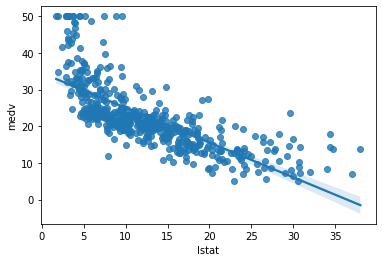

In [66]:
#plot medv and lstat along with regression line
#use seaborn: https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot('lstat','medv',data=boston)

## 3.6.3 Multiple Linear Regression

In [68]:
#two variables
ols_mlr=smf.ols("medv~lstat+age",data=boston)
ols_mlr_result=ols_mlr.fit()
ols_mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.98e-88
Time:                        00:51:55   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
boston.columns[:-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [98]:
boston.columns
variables=""
for i in boston.columns[:-1]:
    variables+="+"+i
    
variables=variables[1:]
variables

'crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [99]:
#all variables


ols_all=smf.ols("medv~{}".format(variables),data=boston)
ols_all_result=ols_all.fit()
ols_all_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        01:09:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
#VIF
from patsy import dmatrices
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
#https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

y,X=dmatrices("medv ~"+variables, data=boston, return_type="dataframe")
y

,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2
...,...
502,22.4
503,20.6
504,23.9
505,22.0


In [116]:
X=X.drop(columns="Intercept")
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
503,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
504,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
505,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [117]:
X.values.shape

(506, 13)

In [118]:
X.shape

(506, 13)

In [126]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variables"]=X.columns
vif=vif.round(1)
vif.set_index("variables")

,VIF
variables,
crim,2.1
zn,2.8
indus,14.5
chas,1.2
nox,73.9
rm,77.9
age,21.4
dis,14.7
rad,15.2


## 3.6.4 Interaction Terms

In [128]:
ols_int=smf.ols("medv~lstat*age", data=boston)
ols_int.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           4.86e-88
Time:                        01:33:13   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.5 Non-Linear Transformation

In [135]:
ols_fit2=smf.ols("medv~lstat+pow(lstat,2)", data=boston)
ols_fit2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          1.56e-112
Time:                        01:37:50   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
pow(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.6 Qualitative Predictors

In [140]:
carseats=pd.read_csv("C:/Users/Coby/Desktop/ESC_ML_STUDY/datasets/Carseats.csv",index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [143]:
carseats_trans=pd.get_dummies(carseats)
carseats_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    uint8  
 9   ShelveLoc_Good    400 non-null    uint8  
 10  ShelveLoc_Medium  400 non-null    uint8  
 11  Urban_No          400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_No             400 non-null    uint8  
 14  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 30.9 KB


In [144]:
carseats_trans

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
1,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
2,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
3,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
4,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
5,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
397,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
398,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
399,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [150]:
x_train=carseats_trans.drop(columns=["Sales"])
y_true=carseats_trans["Sales"]

ols_car=sm.OLS(y_true, sm.add_constant(x_train)).fit()
ols_car.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          1.60e-166
Time:                        01:51:29   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3853      0.253     13.370      0.000       2.887       3.883
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Bad       -1.1405      0.118     -9.629      0.000      -1.373      -0.908
ShelveLoc_Good       3.7096      0.121     30.652      0.000       3.472       3.948
ShelveLoc_Medium     0.8162      0.107      7.605      0.000       0.605       1.027
Urban_No             1.6312      0.138     11.789      0.000       1.359       1.903
Urban_Yes            1.7541      0.139     12.629      0.000       1.481       2.027
US_No                1.7847      0.146     12.243      0.000       1.498       2.071
US_Yes               1.6006      0.148     10.783      0.000       1.309       1.892
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [166]:
x_train=carseats_trans.columns[1:]
y_true=carseats_trans.columns[0]
x_train_str=""

for i in x_train:
    x_train_str+="+%s" %i

x_train_str=x_train_str[1:]
x_train_str

ols_car2=smf.ols("%s~%s" %(y_true,x_train_str), data=carseats_trans).fit()
ols_car.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          1.60e-166
Time:                        01:57:36   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3853      0.253     13.370      0.000       2.887       3.883
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Bad       -1.1405      0.118     -9.629      0.000      -1.373      -0.908
ShelveLoc_Good       3.7096      0.121     30.652      0.000       3.472       3.948
ShelveLoc_Medium     0.8162      0.107      7.605      0.000       0.605       1.027
Urban_No             1.6312      0.138     11.789      0.000       1.359       1.903
Urban_Yes            1.7541      0.139     12.629      0.000       1.481       2.027
US_No                1.7847      0.146     12.243      0.000       1.498       2.071
US_Yes               1.6006      0.148     10.783      0.000       1.309       1.892
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""